### Babaahmadi-Narges-610398102-HW1
### importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import more_itertools as mit

#### Reading input file
Here i read the input file and find the number of the cities. After that i change the input matrix such that all rows contain exactly 28 elements(number of the cities-1).
changing the matrix in this way, helps me in making the fitness function.

In [2]:
def input_maker(path):
    #reading the testcase
    file = open(path)
    input_raw = file.read()
    file.close()
    
    #making matris from the file so that it's easier to use it
    input_mat = input_raw.split('\n')
    number_of_towns = int(input_mat[3].split(':')[-1].strip())
    
    #making the town's matrix
    town_mat = []
    for i in range (8, 36):
        help_arr = input_mat[i].split()
        for i in range(len(help_arr)):
            help_arr[i] = int(help_arr[i])
        m = number_of_towns - len(help_arr)
        for i in range(m):
            help_arr.insert(0,0)
            
        town_mat.append(help_arr)

    return town_mat, number_of_towns

### fitness function
In the box bellow i calculated the fitness function using the matrix i made in the last cell.
(i also considered that the salesman will come back from the last city(chromosome[number_of_towns-1] to the first city (chromosome[0]))

In [3]:
#coding the fitness function 
def fitness_func(chromosome):
    overall_cost=0
    
    for i in range(len(chromosome)-1):
        if chromosome[i]<chromosome[i+1]:
            overall_cost += town_mat[chromosome[i]][chromosome[i+1]]
            
        elif chromosome[i] > chromosome[i+1]:
            overall_cost += town_mat[chromosome[i+1]][chromosome[i]]
    if chromosome[0] < chromosome[number_of_towns - 1]:
        overall_cost += town_mat[chromosome[0]][chromosome[number_of_towns-1]]
    elif chromosome[0] > chromosome[number_of_towns - 1]:
        overall_cost += town_mat[chromosome[number_of_towns-1]][chromosome[0]]
    return overall_cost

### making the society
To make the society, i made random permutations of numbers from 0 to (number_of_towns - 1). Then to visualize my society i made a dataframe from the society and their costs.

In [4]:
#with respect to the number of the population, we make the society
def make_society(population):
    society = []
    for i in range(population):
        society.append(mit.random_permutation(range(number_of_towns)))
        
    fitness = []
    for chromosome in society:
        fitness.append(fitness_func(chromosome))
        
    df = pd.DataFrame({'society':society,'fitnesses':fitness})
    print(df)
    return society, df

### choosing parents for crossover
In truncation function, first I divid my data frame. One part has T percent of the population and the othe part has (100-T) percent(obviously:)).\
Then , from the first T percent, i randomly chosed N chromosomes.

In [5]:
#choosing parents using truncation method
def truncation(T,N):
    df2 = df.sort_values(by=['fitnesses'])
    T_num = int((T/100)*(len(df2)))
    df2 = df2.head(T_num)
    df2 = df2.sample(N)

    return df2

### crossover
I used order recombination method in here, which means the constructed child has inherited indexes (point1) to (point2) from the first chromosome, and other indexes comes from the second chromosome. 

In [6]:
def order_recombination(chromosome1, chromosome2, point1, point2):
    child = []
    for i in range(number_of_towns):
        child.append(-1)
        
    for i in range(point1, point2+1):
        child[i] = chromosome1[i]
        
    counter = point2+1
    for i in range(point2+1, number_of_towns):
        if (chromosome2[i] not in child):
            child[counter] = chromosome2[i]
            counter+=1
            
    for i in range(point2+1):
        if(chromosome2[i] not in child):
            if counter < number_of_towns :
                child[counter] = chromosome2[i]
                counter+=1
            else:
                counter = 0
                child[counter] = chromosome2[i]
                counter+=1

    return child

### mutation
In order to change the children a bit, so that I don't get stuch in local optimized point, i did mutation on some of the children.\
My mutation function mirrors indexes 4,5,6 to 9,8,7 respectively. 

In [7]:
#implementing mutation
def mutation(chromosome):
    #mirroring the elements between index 4 and index 9
    help_int = 0
    index = 9
    for i in range(4,7):
        help_int = chromosome[index]
        chromosome[index] = chromosome[i]
        chromosome[i] = help_int
        index-=1
    return chromosome

### main part 
in this part I iterate for 100 times.\
usefull information about my variables are included in the comments.

In [ ]:
global children
global town_mat
global number_of_towns
global society
global df

population = 5000

# N is the number of parents that i choose 
N = 1000

# T is the percentage of population that i choose N from 
T = 30

#child_num is the number of children I make in each iteration
child_num = 1500

#child_percentage is the percentage of children that i mutate
child_percentage = 10

#In mean array, I store the mean of different iterations.
#In min1 array I store the minimum of different iterations.
mean = []
min1 = []

town_mat, number_of_towns = input_maker("bayg29.tsp")
society,df = make_society(population)

for i in range(100):
    society = truncation(T, N)['society'].to_list()
    children =[]

    #making the children
    for i in range(child_num):
        res = []
        for j in range(2):
            res.append(np.random.randint(0,N))
        point1 = np.random.randint(0,number_of_towns-1)
        point2 = np.random.randint(point1,number_of_towns-1)
        child = order_recombination(society[res[0]], society[res[1]], point1 , point2)
        children.append(child)
     
    #children mutation
    m = int( (child_percentage/100) * child_num ) # m is the number of children that get mutated

    for i in range(m):
        children[i] = mutation(children[i])
        
    #finding the fittness of the children
    fitness = []
    for child in children:
        fitness.append(fitness_func(child))

    #making a data frame for children
    df_children  = pd.DataFrame({'society':children,'fitnesses':fitness})
    
    df = df.sort_values(by=['fitnesses'])   
    df = df.head(population - child_num)
    
    #adding children to our society
    frames = [df, df_children]
    df = pd.concat(frames)
    df2 = df.sort_values(by=['fitnesses'])
    
    me= df2['fitnesses'].mean()
    mi = df2['fitnesses'].min()
    mean.append(me)
    min1.append(mi)

    print(df2)

In [9]:
print(min1)
print(mean)

[3266, 2964, 2964, 2964, 2964, 2964, 2964, 2932, 2869, 2869, 2752, 2752, 2665, 2665, 2665, 2580, 2580, 2557, 2557, 2501, 2501, 2409, 2406, 2325, 2325, 2325, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2206, 2174, 2174, 2174, 2174, 2147, 2147, 2147, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 1912, 1912, 1911, 1911, 1869, 1869, 1869, 1865, 1865, 1821, 1821, 1821, 1801, 1801, 1736, 1736, 1705, 1705, 1705, 1705, 1705, 1699, 1696, 1696, 1656, 1653, 1624, 1624, 1624, 1624, 1624, 1624, 1624, 1624, 1622, 1622, 1617, 1617, 1617, 1617, 1610, 1610, 1610, 1610, 1610, 1610, 1610, 1610, 1610, 1610]
[4512.2512, 4358.6558, 4233.0132, 4125.1142, 4023.307, 3932.5618, 3849.8888, 3769.5844, 3698.152, 3629.228, 3566.3354, 3504.9338, 3447.1536, 3394.2416, 3342.942, 3295.981, 3251.5252, 3207.6516, 3165.2282, 3127.8008, 3084.5286, 3049.1616, 3014.6608, 2981.7136, 2952.159, 2924.367, 2896.0814, 2867.2142, 2838.5924, 2815.3492, 2787.8636, 2761.6844, 2738.0394, 2712.862, 2691.7142, 2666.1978, 2643.4802,

<AxesSubplot:>

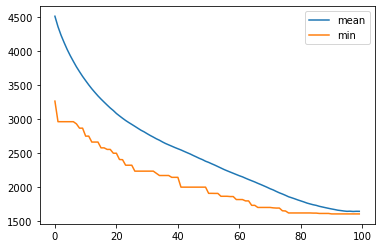

In [10]:
data = pd.DataFrame({'mean':mean, 'min':min1})
data.plot()

### Best chromosome with its fitness

In [11]:
print(df2.head(1))

                                               society  fitnesses
736  [11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17,...       1610
